<a href="https://colab.research.google.com/github/AzzaOmer1/The-Saviour/blob/main/FinalCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
pd.set_option('display.max_columns', None) #display all columns
import plotly.express as px #visualization library
import matplotlib.pyplot as plt #visualization library
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
!pip install catboost
from catboost import CatBoostClassifier
from sklearn import preprocessing #models library
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1 Getting the customer churn data from kaggle

In [ ]:
cust_churn_data = pd.read_csv('CCP_data.csv') #importing the customer churn data from the csv file into python

#2 data cleaning and preparation

In [ ]:
#having a look at the first five rows of the customer churn data file

cust_churn_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,yes
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,no
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,yes
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,yes


we can see that the column names are in place so no adjustments are needed here, now we obtain a high-level summary of the data using .info()

In [ ]:
cust_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

we can clearly see that there are no missing values (NaN) since the count of all columns is 50000 which is the total number of entries, also we can see that we are dealing with three different data types float, int and object. we can also see that all columns have the correct corresponding data type



```
# This is formatted as code
```

now we will try and have a deeper look into the data by creating a function to see how many unique values each feature has


In [ ]:
cust_churn_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
def uniqueval(df, message):
  print(f'{message}:')
  print(df.nunique())

uniqueval(cust_churn_data, 'unique values in the dataset')

unique values in the dataset:
state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64


based on the previous result we can see that the dataset has 5000 rows and 20 columns

there are four categorical features :
* State:  2-letter code of the customer residence
* Area Code: 3 digit area code.
* International Plan: wether the customer has international plan (yes/no).
* Voice Mail Plan: wether the customer has voice mail plan (yes/no).


Also, there are 15 numerical features :
* account length: Number of months the customer has been with the current telco provider
* number_vmail_messages: Number of voice-mail messages.
* total_day_minutes: Total minutes of day calls.
* total_day_calls: Total minutes of day calls.
* total_day_charge: Total charge of day calls.
* total_eve_minutes: Total minutes of evening calls.
* total_eve_calls: Total number of evening calls.
* total_eve_charge: Total charge of evening calls.
* total_night_minutes: Total minutes of night calls.
* total_night_calls: Total number of night calls.
* total_night_charge: Total charge of night calls.
* total_intl_minutes: Total minutes of international calls.
* total_intl_calls: Total number of international calls.
* total_intl_charge: Total charge of international calls
* number_customer_service_calls: Number of calls to customer service

finally, there's the prediction feature:
* Churn: Whether the customer churned or not (Yes or No)

these features can be divided into:
Demographic customer information:
State and Area Code

Services that each customer has signed up for:
International Plan and Voice Mail Plan

Customer account information:
account length, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charger, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, total_eve_minutes, total_eve_calls, total_eve_ccharge, number_customer_service_calls

##now we explore the target variable:

#3 Exploratory Data Analysis (EDA)

now we want to take a look at the distribution of churn and see how it spreads

In [ ]:
target_instance = cust_churn_data["churn"].value_counts().to_frame() #this to return a series containing counts of unique values in descending order
target_instance = target_instance.reset_index() #this to reset the index of the dataframe and to use the default one instead
target_instance = target_instance.rename(columns={'index':'category'})
fig = px.pie(target_instance, values='churn', names='category', color_discrete_sequence=["purple","yellow"], title="Distribution of Churn")
fig.show()

We are trying to predict the users that left the company in the previous month, and this diagram shows that it's a binary calssification with an unbalanced target:
* churn: No  = 82.3%
* churn: yes = 17.7%

In [ ]:
import statsmodels.api as sm #import statsmodels
import statsmodels.formula.api as smf #support for formulas
from statsmodels.formula.api import glm #to use glm() directly

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in cust_churn1.columns]

#Effect the change to the dataframe column names
cust_churn1.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'churn ~ {glm_columns}', data=cust_churn1, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.7
Date:                Fri, 03 Feb 2023   Deviance:                       4061.3
Time:                        10:23:18   Pearson chi2:                 5.35e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Now we'll take a look at the relationship that each individual categorical feature has with the target variable to get a sense of which feature might be important:

In [ ]:
#Defining bar chart function
def bar(feature, df= cust_churn_data ):
    #Groupby the categorical feature
    temp_df = cust_churn_data.groupby([feature, 'churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='churn', title=f'churn rate by {feature}', barmode="group", color_discrete_sequence=["purple", "yellow"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [ ]:
#state feature plot
bar('state')

#area code feature plot
bar('area_code')

#international plan feature plot
cust_churn_data.loc[cust_churn_data.international_plan==0,'international_plan'] = "No"   #convert 0 to No in all data instances
cust_churn_data.loc[cust_churn_data.international_plan==1,'international_plan'] = "Yes"  #convert 1 to Yes in all data instances
bar('international_plan')

#voice mail plan feature plot
cust_churn_data.loc[cust_churn_data.voice_mail_plan==0,'voice_mail_plan'] = "No"   #convert 0 to No in all data instances
cust_churn_data.loc[cust_churn_data.voice_mail_plan==1,'voice_mail_plan'] = "Yes"  #convert 1 to Yes in all data instances
bar('voice_mail_plan')

we can see that there is a variation in the distribution of churn in states, the state with the highest churn rate (count = 31) is NJ state

there's a higher proportion of churners in customers with area code 415 while churners of the remaining two areas are approximately close percentages

also customers with no international plan and no voice mailplan have higher proportion of churners than users with subscribtions in those plans.

now for numerical features, we can use the histogram diagram to check the relationship between the individual numeric variable and the target variable.

In [ ]:
#Numerical Features Histograms
num_feats = list(cust_churn_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)
cust_churn_data[num_feats].hist(figsize=(20,15));

#### write down the explanation


#Data PreProcessing


In this section, we’ll gain more insights and convert the data into a data representation suitable for various machine learning algorithms

In [ ]:
feats = list(cust_churn_data.select_dtypes(include=['object','category']).columns)
le = LabelEncoder()
df = cust_churn_data
for f in feats:
    le.fit(df[f])
    cust_churn_data[f] = le.transform(cust_churn_data[f])

In [ ]:
cust_churn_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1
1,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1
4,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1


In [ ]:
# Plot the correlations as a heatmap

corr = cust_churn_data.corr()
fig = px.imshow(corr, text_auto=False, width=1000, height= 900)

fig.show()

since the correlation between (total_day_minutes, total_day_charges) = 1, (voice_mail_plan, number_vmail_messages) = 0.95, (total_even_minutes, total_even_charges)= 1, (total_night_minutes, total_night_charges) = 0.99, (total_intl_minutes, total_intl_charges) = 0.999993

Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. therefore we can drop one of them

Some models perform worse when they use variables that are highly correlated with others because the model can not distinguish the differences between these two variables when measuring variations in the output variable

If the value is +1 or close to it then we say the variables are positively correlated. And they vary in the same direction simultaneously

If the value is -1 or close to it then we say the variables are negatively correlated. And they vary in the opposite direction simultaneously.

 If the value is 0 or close to it then we say the variables are not correlated.

 from the heatmap we observe that the features correlation ranges between 0 and +1 therefore there's either positive correlation between features or no correlation at all. Also, can see that the churn rate has the highest correlation with international plan, followed by number of customer service calls which makes sense.

 we are concerned here with the correlation between

 hence we drop the following features:
 * total day minutes
 * total evening minutes
 * total night minutes
 * total international minutes
 * voice mail plan

In [ ]:
cust_churn1 = cust_churn_data.drop(['total_day_minutes','total_eve_minutes', 'total_night_minutes','total_intl_minutes', 'voice_mail_plan'], axis=1)
print(); print(cust_churn1.head())


   state  account_length  area_code  international_plan  \
0     16             128          1                   0   
1      1             118          2                   1   
2     12              62          1                   0   
3     46              93          2                   0   
4     29             174          1                   0   

   number_vmail_messages  total_day_calls  total_day_charge  total_eve_calls  \
0                     25              110             45.07               99   
1                      0               98             37.98              101   
2                      0               70             20.52               76   
3                      0              114             32.42              111   
4                      0               76             21.13              112   

   total_eve_charge  total_night_calls  total_night_charge  total_intl_calls  \
0             16.78                 91               11.01                 3   
1  

In [ ]:
cust_churn1.head()

,state,account_length,area_code,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,1,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,1
1,1,118,2,1,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0
2,12,62,1,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4,0
3,46,93,2,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3,1
4,29,174,1,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3,1


after dropping the features with high correlation we will apply some feature engineering based on which collection of features increases the scorve validation most when applied to K-Fold

In [ ]:
def Statistics(features,name):
    for dataset in [cust_churn1]:
        dataset[f"{name}_SD"] = dataset[features].std(axis=1)
        dataset[f"{name}_MEAN"] = dataset[features].mean(axis=1)
        dataset[f"{name}_MIN"] = dataset[features].min(axis=1)
        dataset[f"{name}_MAX"] = dataset[features].max(axis=1)
        dataset[f"{name}_RANGE"] = dataset[f"{name}_MAX"] - dataset[f"{name}_MIN"]
        dataset[f"{name}_RATIO"] = (dataset[f"{name}_MIN"] / dataset[f"{name}_MAX"]).fillna(0)
        dataset[f"{name}_SUM"] = dataset[features].sum(axis=1)

feats = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
Statistics(feats,'charge')

feats = ['total_eve_calls','total_eve_charge']
Statistics(feats,'eve_activity')

In [ ]:
cust_churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   international_plan             5000 non-null   int64  
 4   voice_mail_plan                5000 non-null   int64  
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_calls                5000 non-null   int64  
 7   total_day_charge               5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   float64
 10  total_night_calls              5000 non-null   int64  
 11  total_night_charge             5000 non-null   float64
 12  total_intl_calls               5000 non-null   i

As we mentioned before Churn Prediction is a cjassofocation problem in either customers churn or retain after a given period of time, so to guide us in building our models the following questions need to be answered:
* which features make customers churn or retain?
* what are the most features to train a model with high performance?

we use the generalized linear model (GLM) to gain some insights on the features with the target.

to answer the first question we look at the (P>|z|) column, If the absolute p-value is smaller than 0.05, it means that the feature affects Churn in a statistically significant way and those features are:
* international_plan
* number_vmail_messages
* Charge_MIN
* Charge_RANGE
* Charge_RATIO
* number_customer_service_calls

the answer to the second question is found by  looking at the exponential coefficient values which estimates the expected change in churn through a given feature by a change of one unit.

In [ ]:
np.exp(res.params)

Intercept                        3.971750e-04
state                            1.001643e+00
account_length                   1.001185e+00
area_code                        1.014314e+00
international_plan               4.609398e+00
number_vmail_messages            9.818734e-01
total_day_calls                  1.002212e+00
total_day_charge                 1.570192e+00
total_eve_calls                  1.035449e+01
total_eve_charge                 1.092513e-01
total_night_calls                9.986700e-01
total_night_charge               1.651616e+00
total_intl_calls                 9.730467e-01
total_intl_charge                2.267227e+00
number_customer_service_calls    1.429420e+00
charge_SD                        8.381775e-01
charge_MEAN                      8.952531e-01
charge_MIN                       5.551927e-01
charge_MAX                       8.335221e-01
charge_RANGE                     1.501320e+00
charge_RATIO                     9.972563e+09
charge_SUM                       6

 Values more than 1 indicate increased churn while Values less than 1 indicate that churn is happening less.

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

The machine learning algorithms that do not require feature scaling is mostly non-linear ML algorithms such as Decision trees, gradient boosting classifier and AdaBoost. while logistic regression are SVM linear ML models.

since Algorithms like Decision Trees, Gradient Boosting, etc, are not significantly affected by feature scaling since the trees in these algorithms are constructed based on conditions and are not dependent on the range of values we decide

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

The machine learning algorithms that do not require feature scaling is mostly non-linear ML algorithms such as Decision trees, gradient boosting classifier and AdaBoost. while logistic regression are SVM linear ML models.

since Algorithms like Decision Trees, Gradient Boosting, etc, are not significantly affected by feature scaling since the trees in these algorithms are constructed based on conditions and are not dependent on the range of values we decided to apply feature scaling on numeric data as a preprocessing step.

it's important to  split the data before performing any further transformations such as scaling the data because we want to prevent any information about the test set from affecting our training and validation set.

Because we want to be able to measure how well our Machine Learning models perform on data they have never seen before we have to make sure that no information from the test data impacts how the scaling or any other transformation is done.

Next, we do feature selection to enable the machine learning algorithm to train faster, reduce model complexity, increase interpretability, and improve model accuracy if the right features subset is chosen

In [ ]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV #Recursive feature elimination with cross-validation to select features.
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy") #cv Determines the cross-validation splitting strategy.
rfecv.fit(X, y)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score"a)
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

#scaling numeric variables:

In [ ]:
cust_churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   international_plan             5000 non-null   int64  
 4   number_vmail_messages          5000 non-null   int64  
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_calls                5000 non-null   int64  
 8   total_eve_charge               5000 non-null   float64
 9   total_night_calls              5000 non-null   int64  
 10  total_night_charge             5000 non-null   float64
 11  total_intl_calls               5000 non-null   int64  
 12  total_intl_charge              5000 non-null   f

In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
cust_churn1[['account_length','number_vmail_messages','total_day_calls','total_day_charge','total_eve_calls','total_eve_charge','total_night_calls','total_night_charge','total_intl_calls','total_intl_charge','number_customer_service_calls','eve_activity_SUM','eve_activity_SD','eve_activity_RANGE','eve_activity_RATIO','eve_activity_MAX','eve_activity_MIN','eve_activity_MEAN','charge_SD','charge_RANGE','charge_RATIO','charge_MAX','charge_MIN','charge_MEAN','charge_SUM']] = scaler.fit_transform(cust_churn1[['account_length','number_vmail_messages','total_day_calls','total_day_charge','total_eve_calls','total_eve_charge','total_night_calls','total_night_charge','total_intl_calls','total_intl_charge','number_customer_service_calls','eve_activity_SUM','eve_activity_SD','eve_activity_RANGE','eve_activity_RATIO','eve_activity_MAX','eve_activity_MIN','eve_activity_MEAN','charge_SD','charge_RANGE','charge_RATIO','charge_MAX','charge_MIN','charge_MEAN','charge_SUM']])


In [ ]:
cust_churn1.head()

,state,account_length,area_code,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,charge_SD,charge_MEAN,charge_MIN,charge_MAX,charge_RANGE,charge_RATIO,charge_SUM,eve_activity_SD,eve_activity_MEAN,eve_activity_MIN,eve_activity_MAX,eve_activity_RANGE,eve_activity_RATIO,eve_activity_SUM
0,16,0.524793,1,0,0.480769,0.666667,0.754183,0.582353,0.542866,0.520000,0.619584,0.15,0.500000,0.111111,1,0.694153,0.718793,0.500000,0.705611,0.710416,0.168387,0.718793,0.539431,0.583892,0.542866,0.582353,0.539431,0.224863,0.583892
1,1,0.483471,2,1,0.000000,0.593939,0.635542,0.594118,0.606600,0.674286,0.516601,0.30,0.314815,0.000000,0,0.573521,0.610216,0.314815,0.563527,0.589126,0.125813,0.610216,0.539627,0.603913,0.606600,0.594118,0.539627,0.246287,0.603913
2,12,0.252066,1,0,0.000000,0.424242,0.343373,0.447059,0.844710,0.565714,0.514350,0.30,0.655556,0.444444,0,0.333283,0.496859,0.655556,0.325651,0.316072,0.381090,0.496859,0.327319,0.514953,0.844710,0.447059,0.327319,0.455780,0.514953
3,46,0.380165,2,0,0.000000,0.690909,0.542503,0.652941,0.600129,0.691429,0.328081,0.15,0.405556,0.333333,1,0.485038,0.492488,0.405556,0.452104,0.468632,0.189873,0.492488,0.606548,0.653336,0.600129,0.652941,0.606548,0.221709,0.653336
4,29,0.714876,1,0,0.000000,0.460606,0.353581,0.658824,0.761889,0.657143,0.634778,0.25,0.775926,0.333333,1,0.272911,0.508331,0.775926,0.274349,0.252141,0.500098,0.508331,0.580304,0.683595,0.761889,0.658824,0.580304,0.278955,0.683595


#MODELING

In [ ]:
lr_params = {'C':10, 'max_iter': 10000}
sv_params = {'C':500.0, 'kernel':'rbf'}
dt_params = {'max_depth' : 15}
gb_params = {'max_depth' : 3}
cb_params = {'depth': 5, 'iterations': 1000, 'learning_rate': 0.01, 'verbose':0}

In [ ]:
lr = LogisticRegression(**lr_params, random_state=42)
sv = SVC(**sv_params, random_state=42)
dt = DecisionTreeClassifier(**dt_params, random_state=42)
gb = GradientBoostingClassifier(**gb_params, random_state=42)
cb = CatBoostClassifier(**cb_params, random_state=42)

Next, we do feature selection to enable the machine learning algorithm to train faster, reduce model complexity, increase interpretability, and improve model accuracy if the right features subset is chosen

In [ ]:
cust_churn1.head()

,state,account_length,area_code,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,charge_SD,charge_MEAN,charge_MIN,charge_MAX,charge_RANGE,charge_RATIO,charge_SUM,eve_activity_SD,eve_activity_MEAN,eve_activity_MIN,eve_activity_MAX,eve_activity_RANGE,eve_activity_RATIO,eve_activity_SUM
0,16,128,1,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,1,18.385275,18.8900,2.70,45.07,42.37,0.059907,75.56,58.138320,57.890,16.78,99.0,82.22,0.169495,115.78
1,1,118,2,1,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0,15.688927,16.9025,1.70,37.98,36.28,0.044760,67.61,58.159533,59.875,18.75,101.0,82.25,0.185644,119.75
2,12,62,1,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4,0,10.319152,14.8275,3.54,26.11,22.57,0.135580,59.31,35.277557,51.055,26.11,76.0,49.89,0.343553,102.11
3,46,93,2,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3,1,13.711174,14.7475,2.19,32.42,30.23,0.067551,58.99,65.372022,64.775,18.55,111.0,92.45,0.167117,129.55
4,29,174,1,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3,1,8.969732,15.0375,4.19,23.55,19.36,0.177919,60.15,62.543595,67.775,23.55,112.0,88.45,0.210268,135.55


In the first test split the test_size parameter is set to 0.2, which splits the data into 80% training data and 20% test data. In order to split the 80% training data into training and validation data and ensuring that the validation data is 20% of the size of the original data set the test_size parameter needs to be 0.25 (20% is one quarter, or 0.25, of 80%).

In [ ]:
#Save the predictions to calculate the metrics later
preds = pd.DataFrame(index=cust_churn1.index)

#Logistic Regression

In [ ]:
X = cust_churn1.drop('churn',axis=1)
y = cust_churn1['churn']


scores = []
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(X,y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    lr.fit(X_train,y_train)
    y_preds = lr.predict(X_test)
    preds.loc[test_index,'LR'] = y_preds.copy()

    scores.append(roc_auc_score(y_test,y_preds))
    print(scores[-1])

print(f'Mean AUC of Logistic Regression: {np.mean(scores)}')

0.5633001764249577
0.5338674135552032
0.5649408598828868
0.5496014992689003
0.5592911423687625
Mean AUC of Logistic Regression: 0.5542002183001421


#DEcision Tree

In [ ]:
X = cust_churn1.drop('churn',axis=1)
y = cust_churn1['churn']


scores = []
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(X,y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    dt.fit(X_train,y_train)
    y_preds = dt.predict(X_test)
    preds.loc[test_index,'DT'] = y_preds.copy()

    scores.append(roc_auc_score(y_test,y_preds))
    print(scores[-1])

print(f'Mean AUC of Decision Tree: {np.mean(scores)}')

0.7406278531759924
0.7743442414756541
0.732153276904806
0.7566056387338591
0.7511069464752764
Mean AUC of Decision Tree: 0.7509675913531176


#SVM

In [ ]:
X = cust_churn1.drop('churn',axis=1)
y = cust_churn1['churn']


scores = []
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(X,y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    sv.fit(X_train,y_train)
    y_preds = sv.predict(X_test)
    preds.loc[test_index,'SVM'] = y_preds.copy()

    scores.append(roc_auc_score(y_test,y_preds))
    print(scores[-1])

print(f'Mean AUC of Support Vector Machine: {np.mean(scores)}')

0.5
0.5
0.5
0.5
0.5
Mean AUC of Support Vector Machine: 0.5


#Gradient Boost Clasifier

In [ ]:
X = cust_churn1.drop('churn',axis=1)
y = cust_churn1['churn']


scores = []
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(X,y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    gb.fit(X_train,y_train)
    y_preds = gb.predict(X_test)
    preds.loc[test_index,'GB'] = y_preds.copy()

    scores.append(roc_auc_score(y_test,y_preds))
    print(scores[-1])

print(f'Mean AUC of Gradient Boost {np.mean(scores)}')

0.7709427408337968
0.812920897090018
0.7846723095193964
0.8046591291334583
0.7996169450336719
Mean AUC of Gradient Boost 0.7945624043220683


#catBoost

In [ ]:
X = cust_churn1.drop('churn',axis=1)
y = cust_churn1['churn']


scores = []
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(X,y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    cb.fit(X_train,y_train)
    y_preds = cb.predict(X_test)
    preds.loc[test_index,'CB'] = y_preds.copy()

    scores.append(roc_auc_score(y_test,y_preds))
    print(scores[-1])

print(f'Mean AUC of Catboost: {np.mean(scores)}')

0.7681178820767345
0.8185706146041422
0.7830625175910099
0.8074839878905204
0.8058741959621339
Mean AUC of Catboost: 0.7966218396249081


#metrics measurment

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score
#Metrics for Logistic Regression
print('Logistic Regression')
print("AUC: ",roc_auc_score(y, preds['LR']))
print("Precision: ",precision_score(y, preds['LR']))
print("Recall: ",recall_score(y, preds['LR']))
print("F1 Score: ",f1_score(y, preds['LR']))

Logistic Regression
AUC:  0.5542002183001421
Precision:  0.5757575757575758
Recall:  0.1288135593220339
F1 Score:  0.21052631578947367


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score
#Metrics for SVM
print('SVM')
print("AUC: ",roc_auc_score(y, preds['SVM']))
print("Precision: ",precision_score(y, preds['SVM']))
print("Recall: ",recall_score(y, preds['SVM']))
print("F1 Score: ",f1_score(y, preds['SVM']))

SVM
AUC:  0.5
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score
#Metrics for Catboost
print('Catboost')
print("AUC: ",roc_auc_score(y, preds['CB']))
print("Precision: ",precision_score(y, preds['CB']))
print("Recall: ",recall_score(y, preds['CB']))
print("F1 Score: ",f1_score(y, preds['CB']))

Catboost
AUC:  0.7966218396249083
Precision:  0.8923841059602649
Recall:  0.6090395480225989
F1 Score:  0.7239758226997984


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score
#Metrics for Decision Tree
print('Decision Tree')
print("AUC: ",roc_auc_score(y, preds['DT']))
print("Precision: ",precision_score(y, preds['DT']))
print("Recall: ",recall_score(y, preds['DT']))
print("F1 Score: ",f1_score(y, preds['DT']))

Decision Tree
AUC:  0.7509675913531176
Precision:  0.7234678624813154
Recall:  0.5468926553672316
F1 Score:  0.6229086229086229


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score
#Metrics for Gradient Boost
print('Gradient Boost')
print("AUC: ",roc_auc_score(y, preds['GB']))
print("Precision: ",precision_score(y, preds['GB']))
print("Recall: ",recall_score(y, preds['GB']))
print("F1 Score: ",f1_score(y, preds['GB']))

Gradient Boost
AUC:  0.7945624043220683
Precision:  0.8874172185430463
Recall:  0.6056497175141243
F1 Score:  0.7199462726662189


`## Show the Features Importances `

In [ ]:
#Plot the Features Importances
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('importances-01.png')
    plt.show()
    sns.set()

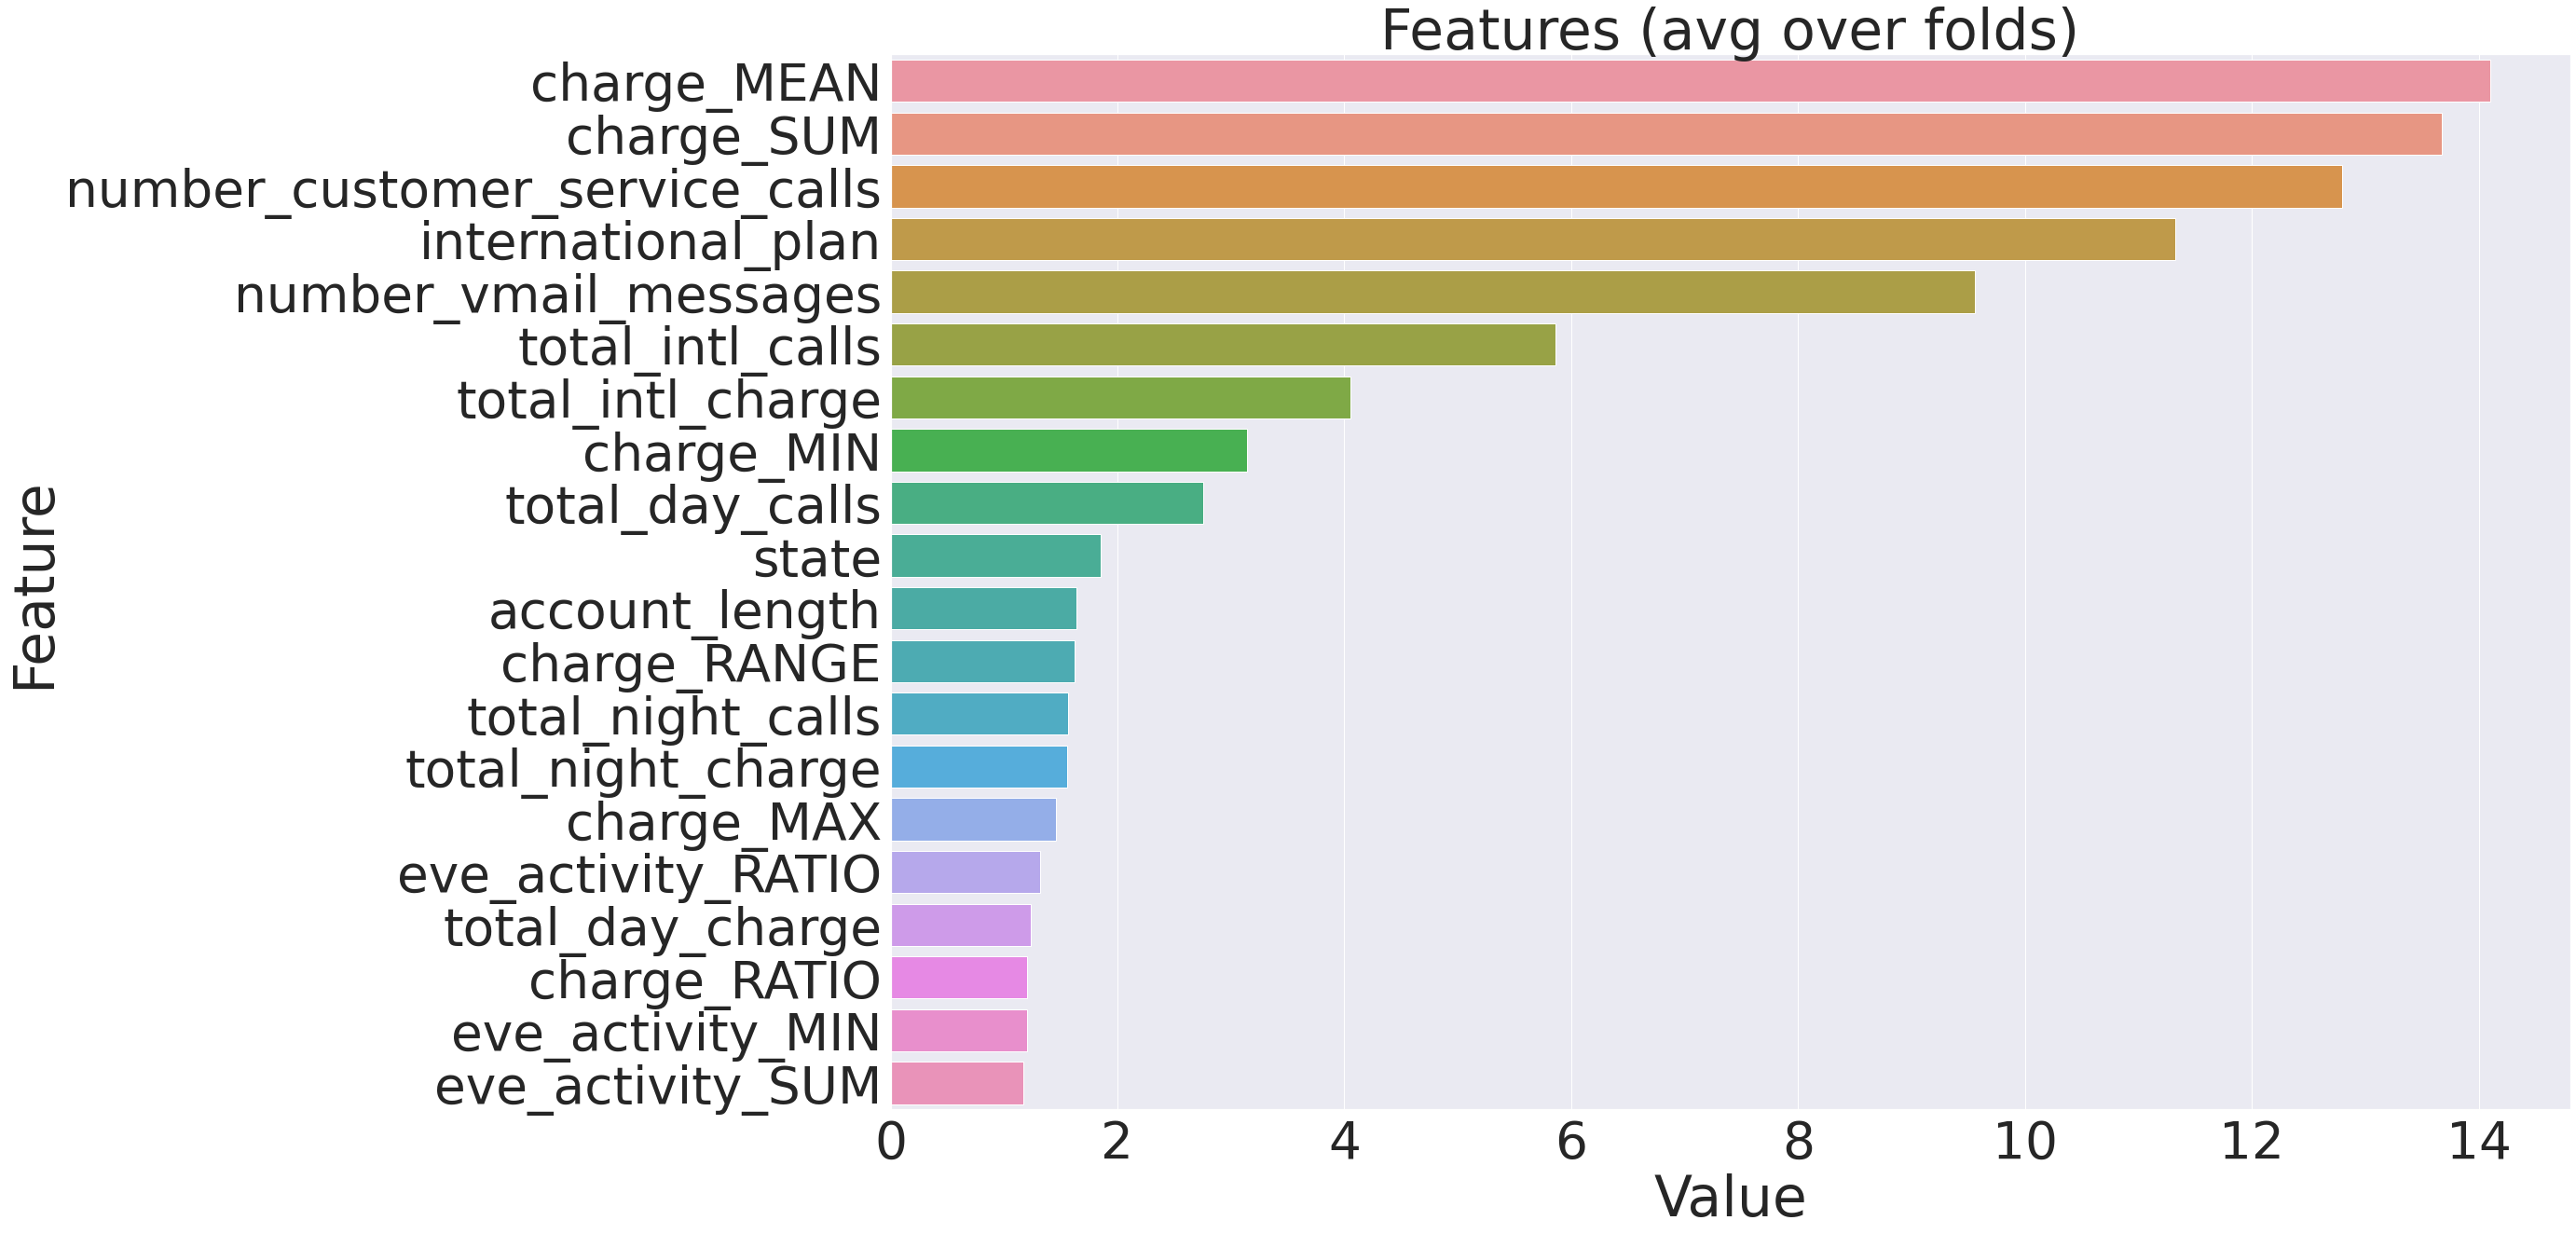

In [ ]:
plotImp(cb,cust_churn1.drop('churn',axis=1))

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score , f1_score

index_=['Logistic Regression',
        'Decision Tree',
        'Support Vector Machine',
        'CatBoost',
        'Gradient Boost']

all_models = {'AUC':np.round([roc_auc_score(y, preds['LR']),
                                            roc_auc_score(y, preds['DT']),
                                            roc_auc_score(y, preds['SVM']),
                                            roc_auc_score(y, preds['CB']),
                                            roc_auc_score(y, preds['GB']),], 3),
              'Precision Score':np.round([precision_score(y, preds['LR']),
                                            precision_score(y, preds['DT']),
                                            precision_score(y, preds['SVM']),
                                            precision_score(y, preds['CB']),
                                            precision_score(y, preds['GB']),], 3),
              'Recall Score':np.round([recall_score(y, preds['LR']),
                                            recall_score(y, preds['DT']),
                                            recall_score(y, preds['SVM']),
                                            recall_score(y, preds['CB']),
                                            recall_score(y, preds['GB']),], 3),
              'F1 Score':np.round([f1_score(y, preds['LR']),
                                            f1_score(y, preds['DT']),
                                            f1_score(y, preds['SVM']),
                                            f1_score(y, preds['CB']),
                                            f1_score(y, preds['GB']),], 3)
}

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
final_results_df = pd.DataFrame(data=all_models, index=index_)
final_results_df.sort_values(by='AUC', ascending=False)